In [39]:
import pandas as pd
import requests
import json
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [1]:
url = "http://dnd5eapi.co/api"

In [2]:
query = '/monsters/'

In [3]:
monsters = []

for i in range(1,326):
    response = requests.get(url+query+str(i)+'/')

    data = json.loads(response.text)
    monsters.append(data)

In [4]:
monsters[:2]

[{'_id': '5bce91465b7768e7920181a5',
  'index': 1,
  'name': 'Aboleth',
  'size': 'Large',
  'type': 'aberration',
  'subtype': '',
  'alignment': 'lawful evil',
  'armor_class': 17,
  'hit_points': 135,
  'hit_dice': '18d10',
  'speed': '10 ft., swim 40 ft.',
  'strength': 21,
  'dexterity': 9,
  'constitution': 15,
  'intelligence': 18,
  'wisdom': 15,
  'constitution_save': 6,
  'intelligence_save': 8,
  'wisdom_save': 6,
  'history': 12,
  'perception': 10,
  'damage_vulnerabilities': '',
  'damage_resistances': '',
  'damage_immunities': '',
  'condition_immunities': '',
  'senses': 'darkvision 120 ft., passive Perception 20',
  'languages': 'Deep Speech, telepathy 120 ft.',
  'challenge_rating': 10,
  'special_abilities': [{'attack_bonus': 0,
    'desc': 'The aboleth can breathe air and water.',
    'name': 'Amphibious'},
   {'attack_bonus': 0,
    'desc': 'While underwater, the aboleth is surrounded by transformative mucus. A creature that touches the aboleth or that hits it wit

In [5]:
dnd_df = pd.DataFrame(monsters)

In [6]:
dnd_df.head()

,_id,index,name,size,type,subtype,alignment,armor_class,hit_points,hit_dice,...,arcana,athletics,acrobatics,strength_save,reactions,survival,investigation,nature,intimidation,performance
0,5bce91465b7768e7920181a5,1,Aboleth,Large,aberration,,lawful evil,17,135,18d10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5bce91465b7768e7920181a3,2,Acolyte,Medium,humanoid,any race,any alignment,10,9,2d8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5bce91465b7768e7920181a4,3,Adult Black Dragon,Huge,dragon,,chaotic evil,19,195,17d12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5bce91465b7768e7920181b3,4,Adult Blue Dracolich,Huge,undead,,lawful evil,19,225,18d12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5bce91465b7768e7920181a6,5,Adult Blue Dragon,Huge,dragon,,lawful evil,19,225,18d12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
align = ['lawful evil', 'chaotic evil', 'chaotic good',
       'lawful good', 'neutral', 'lawful neutral',
       'neutral evil', 'neutral good', 'chaotic neutral']

dnd_df[dnd_df['alignment'].isin(align)].shape

(170, 51)

In [16]:
dnd_df[dnd_df['type'] == 'swarm of Tiny beasts']

,_id,index,name,size,type,subtype,alignment,armor_class,hit_points,hit_dice,...,arcana,athletics,acrobatics,strength_save,reactions,survival,investigation,nature,intimidation,performance
73,5bce91465b7768e7920181ec,74,Couatl,Medium,celestial,,lawful good,19,97,13d8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,5bce91465b7768e7920181f5,83,Deva,Medium,celestial,,lawful good,17,136,16d8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,5bce91465b7768e79201827f,221,Pegasus,Large,celestial,,chaotic good,12,59,7d10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,5bce91465b7768e792018282,224,Planetar,Large,celestial,,lawful good,19,200,16d10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,5bce91465b7768e7920182a9,260,Solar,Large,celestial,,lawful good,21,243,18d10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289,5bce91465b7768e7920182c4,290,Unicorn,Large,celestial,,lawful good,12,67,9d10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
y = dnd_df['challenge_rating']
x = dnd_df.drop('challenge_rating', axis=1)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format='retina'


In [12]:
dnd_df[['languages','challenge_rating']].corr()

,challenge_rating
challenge_rating,1.0


In [13]:
stats = ['challenge_rating','athletics','constitution_save','hit_points','insight',
         'intimidation','investigation','nature','perception','strength_save']

dnd_df[stats].corr()

,challenge_rating,athletics,constitution_save,hit_points,insight,intimidation,investigation,nature,perception,strength_save
challenge_rating,1.000000,0.918419,0.954278,0.941061,0.903432,1.000000,1.0,-1.0,0.924905,0.924524
athletics,0.918419,1.000000,0.590301,0.898881,NaN,NaN,NaN,NaN,0.832479,0.942112
constitution_save,0.954278,0.590301,1.000000,0.931750,0.903721,NaN,NaN,NaN,0.911658,0.920522
hit_points,0.941061,0.898881,0.931750,1.000000,0.785721,0.986444,1.0,-1.0,0.897462,0.926112
insight,0.903432,NaN,0.903721,0.785721,1.000000,NaN,NaN,NaN,0.823799,NaN
intimidation,1.000000,NaN,NaN,0.986444,NaN,1.000000,NaN,NaN,NaN,NaN
investigation,1.000000,NaN,NaN,1.000000,NaN,NaN,1.0,NaN,1.000000,NaN
nature,-1.000000,NaN,NaN,-1.000000,NaN,NaN,NaN,1.0,1.000000,NaN
perception,0.924905,0.832479,0.911658,0.897462,0.823799,NaN,1.0,1.0,1.000000,1.000000
strength_save,0.924524,0.942112,0.920522,0.926112,NaN,NaN,NaN,NaN,1.000000,1.000000


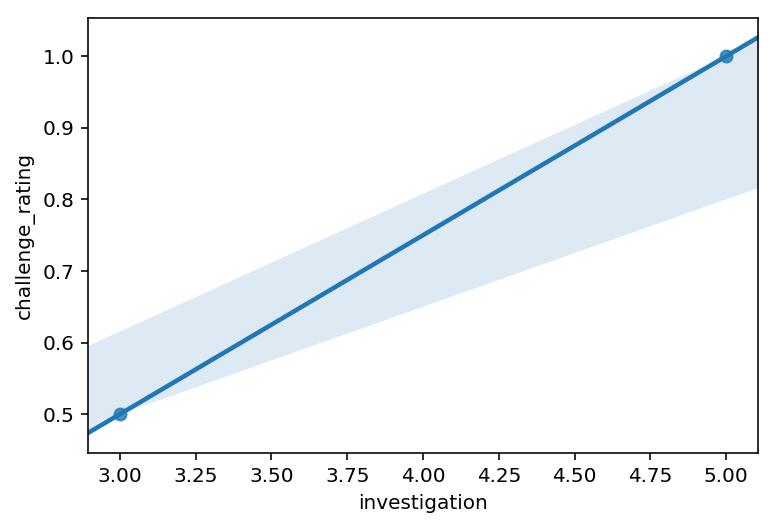

In [14]:
sns.regplot('investigation', 'challenge_rating',dnd_df)

In [74]:
small_df = dnd_df.copy()

In [75]:
small_df = small_df.loc[:, ~(small_df.isna().any())]
        
small_df.head()

,_id,index,name,size,type,subtype,alignment,armor_class,hit_points,hit_dice,...,intelligence,wisdom,damage_vulnerabilities,damage_resistances,damage_immunities,condition_immunities,senses,languages,challenge_rating,url
0,5bce91465b7768e7920181a5,1,Aboleth,Large,aberration,,lawful evil,17,135,18d10,...,18,15,,,,,"darkvision 120 ft., passive Perception 20","Deep Speech, telepathy 120 ft.",10.00,http://www.dnd5eapi.co/api/monsters/1
1,5bce91465b7768e7920181a3,2,Acolyte,Medium,humanoid,any race,any alignment,10,9,2d8,...,10,14,,,,,passive Perception 12,any one language (usually Common),0.25,http://www.dnd5eapi.co/api/monsters/2
2,5bce91465b7768e7920181a4,3,Adult Black Dragon,Huge,dragon,,chaotic evil,19,195,17d12,...,14,13,,,acid,,"blindsight 60 ft., darkvision 120 ft., passive...","Common, Draconic",14.00,http://www.dnd5eapi.co/api/monsters/3
3,5bce91465b7768e7920181b3,4,Adult Blue Dracolich,Huge,undead,,lawful evil,19,225,18d12,...,16,15,,necrotic,"lightning, poison","charmed, exhaustion, frightened, paralyzed, po...","blindsight 60 ft., darkvision 120 ft., passive...","Common, Draconic",17.00,http://www.dnd5eapi.co/api/monsters/4
4,5bce91465b7768e7920181a6,5,Adult Blue Dragon,Huge,dragon,,lawful evil,19,225,18d12,...,16,15,,,lightning,,"blindsight 60 ft., darkvision 120 ft., passive...","Common, Draconic",16.00,http://www.dnd5eapi.co/api/monsters/5


In [76]:
small_df = small_df.drop(['_id', 'url', 'subtype','name', 'languages'],axis=1)

In [77]:
small_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 19 columns):
index                     325 non-null int64
size                      325 non-null object
type                      325 non-null object
alignment                 325 non-null object
armor_class               325 non-null int64
hit_points                325 non-null int64
hit_dice                  325 non-null object
speed                     325 non-null object
strength                  325 non-null int64
dexterity                 325 non-null int64
constitution              325 non-null int64
intelligence              325 non-null int64
wisdom                    325 non-null int64
damage_vulnerabilities    325 non-null object
damage_resistances        325 non-null object
damage_immunities         325 non-null object
condition_immunities      325 non-null object
senses                    325 non-null object
challenge_rating          325 non-null float64
dtypes: float64(1), int64(8)

In [69]:
small_df = small_df.loc[:, ~(small_df == '').any()]


/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [20]:
small_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 15 columns):
alignment           325 non-null object
armor_class         325 non-null int64
challenge_rating    325 non-null float64
constitution        325 non-null int64
dexterity           325 non-null int64
hit_dice            325 non-null object
hit_points          325 non-null int64
index               325 non-null int64
intelligence        325 non-null int64
senses              325 non-null object
size                325 non-null object
speed               325 non-null object
strength            325 non-null int64
type                325 non-null object
wisdom              325 non-null int64
dtypes: float64(1), int64(8), object(6)
memory usage: 38.2+ KB


In [72]:
from sklearn.preprocessing import OneHotEncoder

labels = ['alignment','hit_dice','senses','size','speed','type']
encode = small_df[labels]

onehot = OneHotEncoder()
oh_dnd = onehot.fit_transform(encode).toarray()
names = onehot.get_feature_names(labels)
df_oh = pd.DataFrame(oh_dnd,columns=names)
df_oh.reset_index(drop=True, inplace=True)
small_df.reset_index(drop=True, inplace=True)
# df_oh.head()
df_monsters = pd.concat([df_oh, small_df], axis=1, sort=False)

df_monsters.head()

,alignment_any alignment,alignment_any chaotic alignment,alignment_any evil alignment,alignment_any non-good alignment,alignment_any non-lawful alignment,alignment_chaotic evil,alignment_chaotic good,alignment_chaotic neutral,alignment_lawful evil,alignment_lawful good,...,hit_points,hit_dice,speed,strength,dexterity,constitution,intelligence,wisdom,senses,challenge_rating
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,135,18d10,"10 ft., swim 40 ft.",21,9,15,18,15,"darkvision 120 ft., passive Perception 20",10.00
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9,2d8,30 ft.,10,10,10,10,14,passive Perception 12,0.25
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,195,17d12,"40 ft., fly 80 ft., swim 40 ft.",23,14,21,14,13,"blindsight 60 ft., darkvision 120 ft., passive...",14.00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,225,18d12,"40 ft., burrow 30 ft., fly 80 ft.",25,10,23,16,15,"blindsight 60 ft., darkvision 120 ft., passive...",17.00
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,225,18d12,"40 ft., burrow 30 ft., fly 80 ft.",25,10,23,16,15,"blindsight 60 ft., darkvision 120 ft., passive...",16.00


In [22]:
df_monsters = df_monsters.drop(labels,axis=1)
df_monsters.head()

,alignment_any alignment,alignment_any chaotic alignment,alignment_any evil alignment,alignment_any non-good alignment,alignment_any non-lawful alignment,alignment_chaotic evil,alignment_chaotic good,alignment_chaotic neutral,alignment_lawful evil,alignment_lawful good,...,type_undead,armor_class,challenge_rating,constitution,dexterity,hit_points,index,intelligence,strength,wisdom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,17,10.00,15,9,135,1,18,21,15
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10,0.25,10,10,9,2,10,10,14
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,19,14.00,21,14,195,3,14,23,13
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,19,17.00,23,10,225,4,16,25,15
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,19,16.00,23,10,225,5,16,25,15


In [27]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

In [68]:
X = df_monsters.drop(['challenge_rating', 'dexterity','index'],axis=1)
y = df_monsters['challenge_rating']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [69]:
lr = LinearRegression()

In [79]:
# lr.fit(X_train,y_train)
np.mean(cross_val_score(lr,X,y,cv=5,scoring='neg_mean_squared_error'))

-2.249439418826363e+16

In [73]:
small_df.corr()['challenge_rating']#.loc[:,((small_df.corr() > 0.5).any() & (small_df.corr() < 1.0).any())]


index              -0.202232
armor_class         0.759011
hit_points          0.941061
strength            0.722490
dexterity          -0.023984
constitution        0.859834
intelligence        0.642374
wisdom              0.549235
challenge_rating    1.000000
Name: challenge_rating, dtype: float64

In [25]:
align = ['lawful evil', 'chaotic evil', 'chaotic good',
       'lawful good', 'neutral', 'lawful neutral',
       'neutral evil', 'neutral good', 'chaotic neutral']

df_align = dnd_df[dnd_df['alignment'].isin(align)][['alignment','challenge_rating']]
df_align.shape

(170, 2)

In [26]:
df_align.head()

,alignment,challenge_rating
0,lawful evil,10.0
2,chaotic evil,14.0
3,lawful evil,17.0
4,lawful evil,16.0
5,chaotic good,13.0


In [29]:
align_map = {
    'lawful good':0, 'neutral good':1,'chaotic good':2,
    'lawful neutral':3, 'neutral':4, 'chaotic neutral':5,
    'lawful evil':6,  'neutral evil':7, 'chaotic evil':8
}

good_evil_map = {
    'lawful good':0, 'neutral good':0,'chaotic good':0,
    'lawful neutral':1, 'neutral':1, 'chaotic neutral':1,
    'lawful evil':2,  'neutral evil':2, 'chaotic evil':2
}

law_chaotic_map = {
    'lawful good':0, 'neutral good':1,'chaotic good':2,
    'lawful neutral':0, 'neutral':1, 'chaotic neutral':2,
    'lawful evil':0,  'neutral evil':1, 'chaotic evil':2
}

In [30]:
df_align['align_numeric'] = df_align['alignment'].map(align_map)
df_align['good_evil'] = df_align['alignment'].map(good_evil_map)
df_align['law_chaotic'] = df_align['alignment'].map(law_chaotic_map)

In [31]:
df_align.head()

,alignment,challenge_rating,align_numeric,good_evil,law_chaotic
0,lawful evil,10.0,6,2,0
2,chaotic evil,14.0,8,2,2
3,lawful evil,17.0,6,2,0
4,lawful evil,16.0,6,2,0
5,chaotic good,13.0,2,0,2


In [37]:
df_align['good'] = (df_align['good_evil'] == 0).apply(lambda x : int(x))
df_align['neutral_ge'] = (df_align['good_evil'] == 1).apply(lambda x : int(x))
df_align['evil'] = (df_align['good_evil'] == 2).apply(lambda x : int(x))
df_align.head()

,alignment,challenge_rating,align_numeric,good_evil,law_chaotic,good,neutral_ge,evil
0,lawful evil,10.0,6,2,0,0,0,1
2,chaotic evil,14.0,8,2,2,0,0,1
3,lawful evil,17.0,6,2,0,0,0,1
4,lawful evil,16.0,6,2,0,0,0,1
5,chaotic good,13.0,2,0,2,1,0,0


### Anova Testing

In [38]:
df_align['lawful'] = (df_align['law_chaotic'] == 0).apply(lambda x : int(x))
df_align['neutral_lc'] = (df_align['law_chaotic'] == 1).apply(lambda x : int(x))
df_align['chaotic'] = (df_align['law_chaotic'] == 2).apply(lambda x : int(x))
df_align.head()

,alignment,challenge_rating,align_numeric,good_evil,law_chaotic,good,neutral_ge,evil,lawful,neutral_lc,chaotic
0,lawful evil,10.0,6,2,0,0,0,1,1,0,0
2,chaotic evil,14.0,8,2,2,0,0,1,0,0,1
3,lawful evil,17.0,6,2,0,0,0,1,1,0,0
4,lawful evil,16.0,6,2,0,0,0,1,1,0,0
5,chaotic good,13.0,2,0,2,1,0,0,0,0,1


In [40]:
formula = "challenge_rating ~ C(good) + C(neutral_ge) + C(evil)"
lm = ols(formula,df_align).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                    sum_sq     df          F    PR(>F)
C(good)         988.088713    1.0  24.070007  0.000002
C(neutral_ge)     7.085496    1.0   0.172604  0.678341
C(evil)         159.084440    1.0   3.875324  0.050656
Residual       6855.453483  167.0        NaN       NaN


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [44]:
x = df_align['align_numeric']
y = df_align['challenge_rating']

In [57]:
import numpy as np
x2 = np.random.rand(170)
x2.shape

(170,)

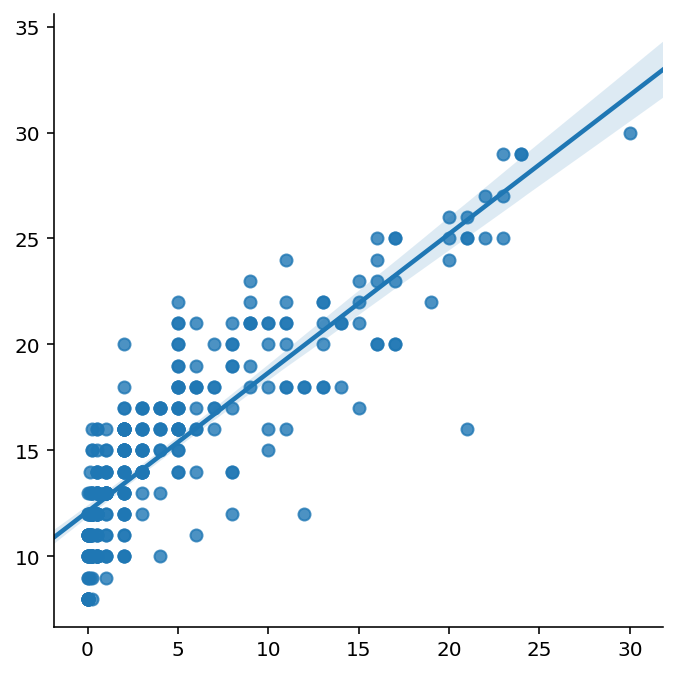

In [82]:
sns.lmplot('challenge_rating','constitution',small_df)
plt.xlabel('')
plt.ylabel('')
#plt.savefig('/users/alexanderbailey/documents/flatiron/blogs/images/lmplot.png')

Text(0, 0.5, '')

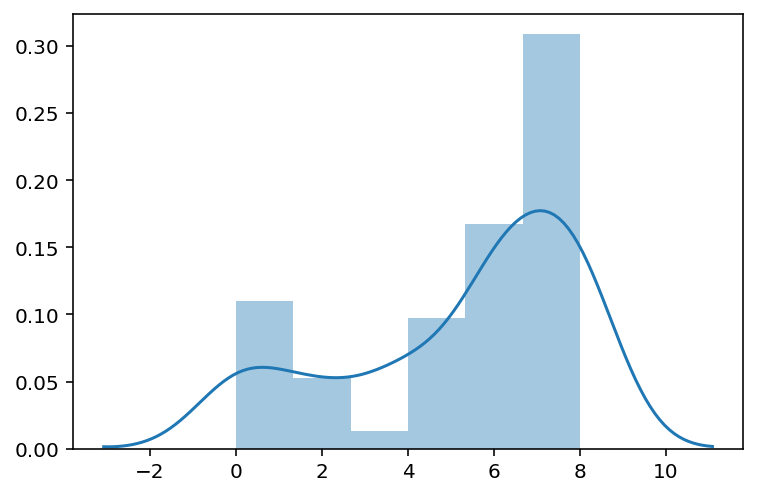

In [86]:
sns.distplot(x)
plt.xlabel('')
plt.ylabel('')
#plt.savefig('/users/alexanderbailey/documents/flatiron/blogs/images/dist.png')